**1. The dataset “bills” contains measurements of a sample of 200 Swiss bank notes such ofwhich are counterfeit and some of which are genuine.  Specifically, the dataset contains thevariable width, the width (in mm) of the bottom margin of the notes, the variable len, the diagonal length (in mm) of the note, and the variable real, an indicator variable taking 
the value 1 if the note is genuine and taking the value 0 if the note is forged.**

*(a) Plot the density contours of (width,len) for the genuine bills and for the forged bills.  Usethe limits (7,12.5) for the width and (138.75,142.25) for length and use cross-validationto choose the smoothing parameters.*

*(b) Using the procedure described in Example 6.3, estimate the probability that a note is forged, as a function of the width of the bottom margin and the diagonal length; presentthe result as a contour plot of the probability function.*

*(c)  For  the  following  bottom  margin  widths,  diagonal  length  pairs  give  estimates  of  theprobability that the note is forged:  (8,140.2), (9,140.5) and (9.8,140.3).*


In [26]:
library('sm')
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/bills.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/bills.csv'
bills<-read.csv(data_loc)

bill.real = subset(bills, real == 1)
bill.real <- subset(bill.real, select = -c(real))
bill.fake = subset(bills, real == 0)
bill.fake <- subset(bill.fake, select = -c(real))

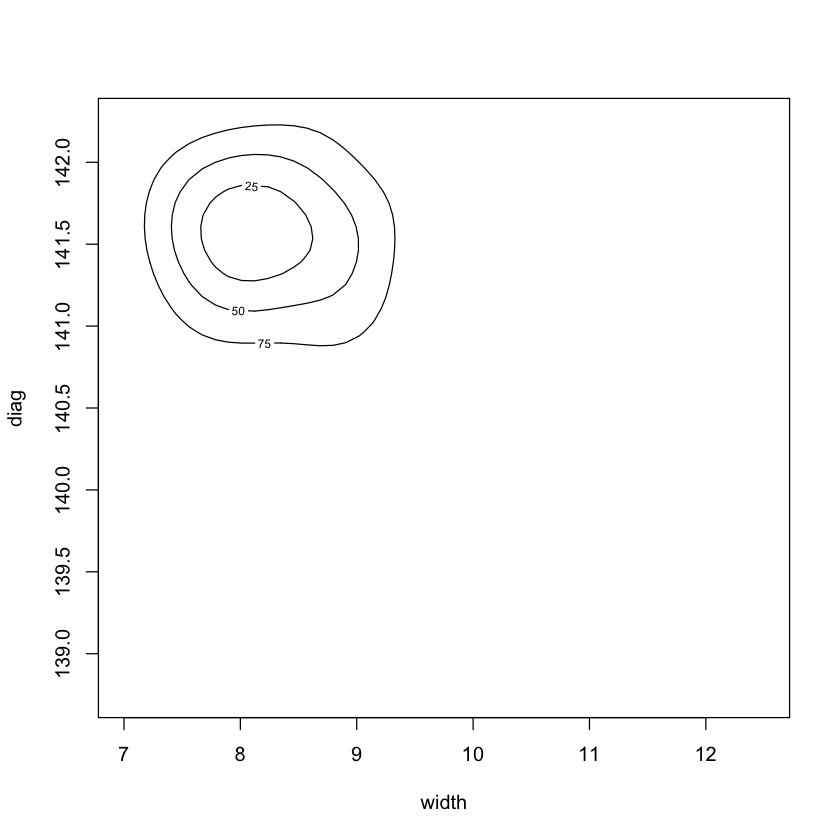

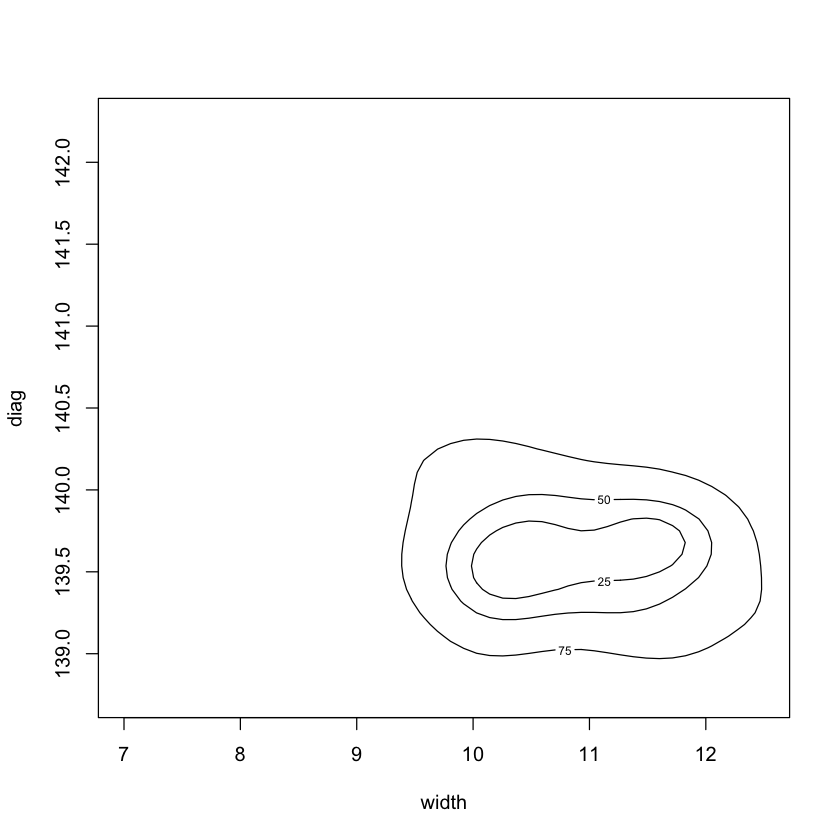

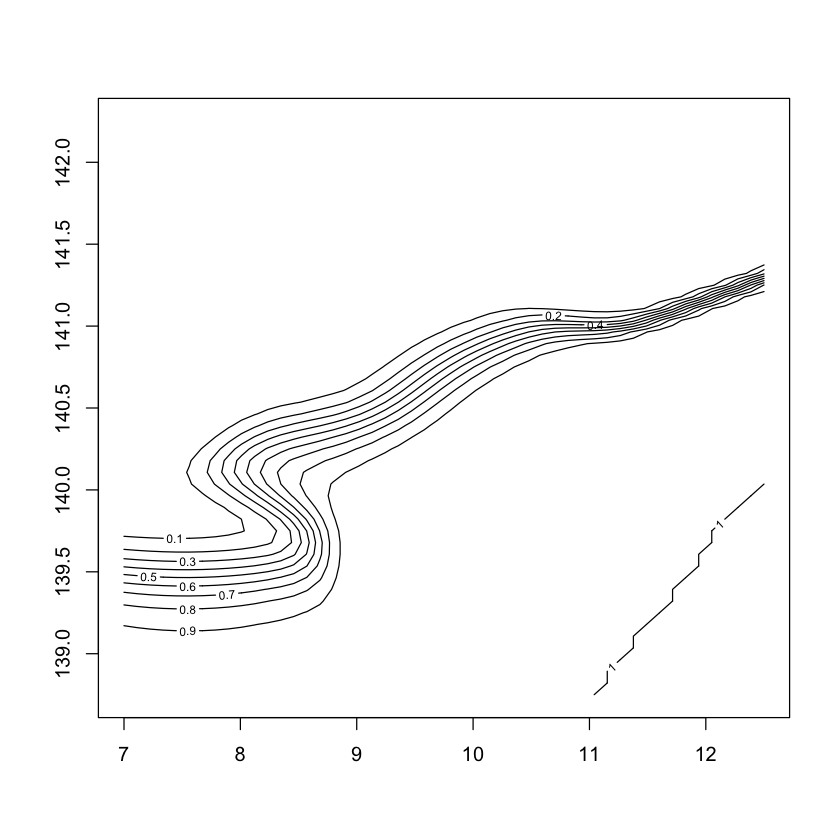

In [10]:
#real
den.real<-sm.density(bill.real, method='cv', display="contour", xlim=c(7,12.5), ylim=c(138.75, 142.25))
#fake
den.fake<-sm.density(bill.fake, method='cv', display="contour", xlim=c(7,12.5), ylim=c(138.75, 142.25))

#probability of being fake
prob.fake=den.fake$estimate/(den.fake$estimate+den.real$estimate)

#plot
contour(x=den.fake$eval.points[,1], y=den.fake$eval.points[,2], z=prob.fake)

In [13]:
library('pracma')
interp2(x=den.fake$eval.points[,1], y=den.fake$eval.points[,2], Z=t(prob.fake), xp=8, yp=140.2, method="linear")

interp2(x=den.fake$eval.points[,1], y=den.fake$eval.points[,2], Z=t(prob.fake), xp=9, yp=140.5, method="linear")

interp2(x=den.fake$eval.points[,1], y=den.fake$eval.points[,2], Z=t(prob.fake), xp=9.8, yp=140.3, method="linear")



[1] 0.4023522

[1] 0.3064428

[1] 0.9762373

**2. This problem uses the “lidar” dataset. These data were collected using a technique knownas LIDAR (light detection and ranging) in which the reflection of laser-emitted light is used to  detect  chemical  compounds  in  the  atmosphere;  this  technique  is  useful  for  monitoring certain atmospheric pollutants. The dataset lidar contains two variables, logratio, the logarithm of the ratio of received light from two sources, and range, the distance traveled before the light is reflected back to its source.  We are interested in modeling logratio as a function of range.**

*(a)  Find  the  local  linear  kernel  regression  estimator  ofE(logratio|range),  using  cross-validation to choose the smoothing parameter.  Plot the estimated regression functiontogether with the raw data.  Give the values of the estimated regression function corresponding to values of range of 500,550 and 600.*

Range 500: -.05

Range 550: -.09

Range 600: -.45

*(b) Calculate the degrees-of-freedom of the estimated regression function.*

10.92

*(c) Estimate the error standard deviationσusing the estimator based on second differences.*

.08

In [24]:
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/lidar.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/lidar.csv'
lid<-read.csv(data_loc)
out=sm.regression(x=lid$range, y=lid$logratio, poly.index=0, method='cv', ngrid=100)
#part a
#approx for range 500
approx(out$eval.points, out$estimate, xout=500)
#approx for range 550
approx(out$eval.points, out$estimate, xout=550)
#approx for range 600
approx(out$eval.points, out$estimate, xout=600)

#part b
df=out$h
#part c
sm.sigma(lid$range, lid$logratio)$estimate

ERROR: Error in sm.regression(x = lid$range, y = lid$logratio, poly.index = 0, : could not find function "sm.regression"


**3.Recall the analysis of the LIDAR data in Problem 2.  Note that the plot of data and theestimated regression line suggests that there is more variability around the regression linefor  large  values  of  range  than  for  small  values  of  range,  i.e.,  the  error  standard  deviationappears to be non-constant.  The purpose of this problem is to use nonparametric regressionto investigate the extent to which the conditional standard deviation of logratio given rangedepends on the value of range.Specifically, we consider a model of the form $Yj=m(Xj)+σ(Xj)δj$ where δ 1,...,δ n are independent, identically distributed random variables each with mean0 and standard deviation 1.  Thus, for a random variable (X,Y) with the same distributionas (Xj,Yj),j= 1,...,n,σ(x) is the conditional standard deviation of Y given X=x.To study the extent to which σ(x) depends on x can use the following procedure:**

*(a) For Y= logratio and X= range, find the estimate  ˆm(x) ofE(Y|X=x) as in question(2) above and,  using the procedure used in Example 8.3,  calculate the residualsej=Yj−ˆm(Xj),j= 1,...,n.*

*(b) Plot |ej| versus Xj.  Note that,E(|ej| |Xj)  ̇=cσ(Xj), wherec=E(|δj|).*

*(c) Estimatecσ(x) using the same type of nonparametric regression estimator used in ques-tion (2), with|ej|as theY-variable andXjas theX-variable.  Plot the estimate on theplot constructed in part (b).*

*(d)  Using the result in part (c) does the assumption of constant error standard deviation seem reasonable?  Why or why not?*

Based on this plot it does not seem reasonable to assume constant error of standard deviation. As we see that when Xj increases the residuals increase and are not constant or i.i.d.

*(e) Use the argument model in sm.regressionto test the hypothesis that cσ(x) is constant;that is, test the hypothesis that the functioncσ(x) estimated above does not depend onx.  What do you conclude?*

Given the small p value suggests that $c\sigma(x)$ does depend on x. 

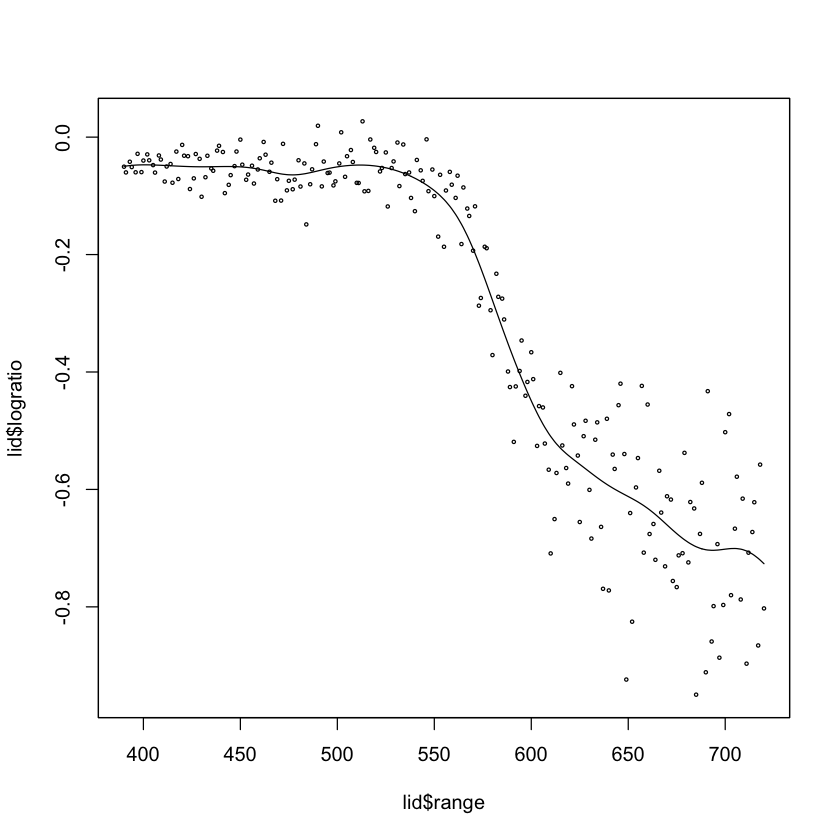

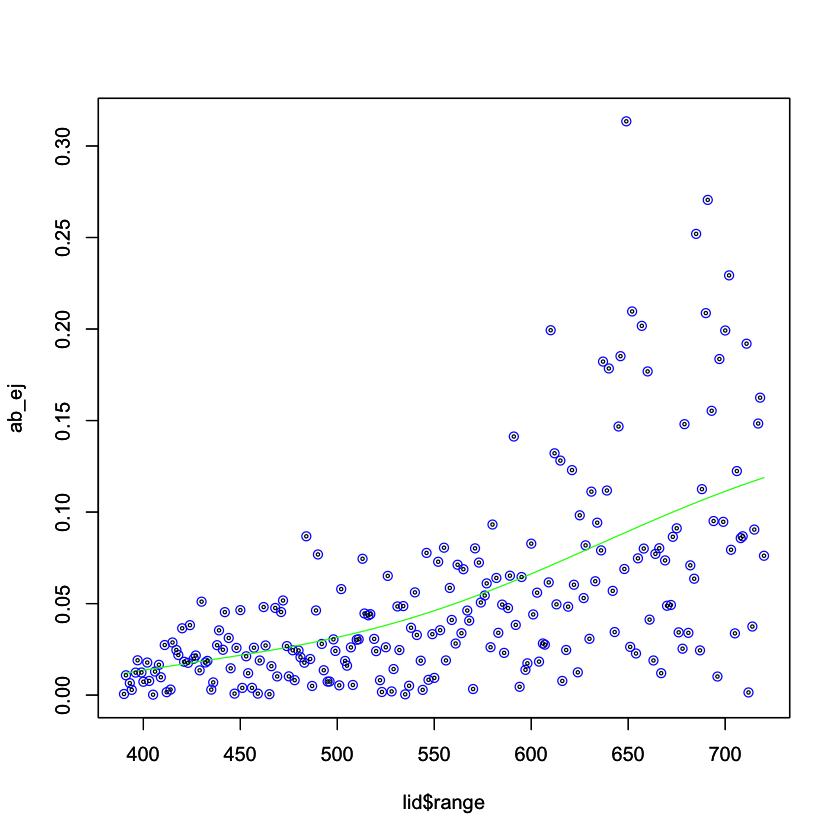

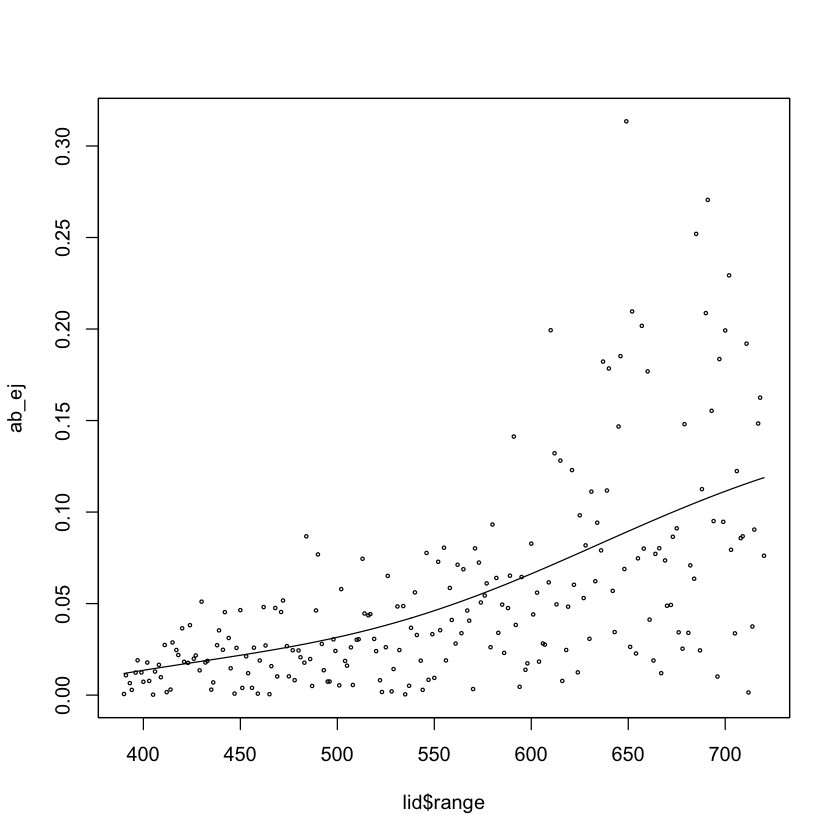

Test of no effect model:  significance =  0 


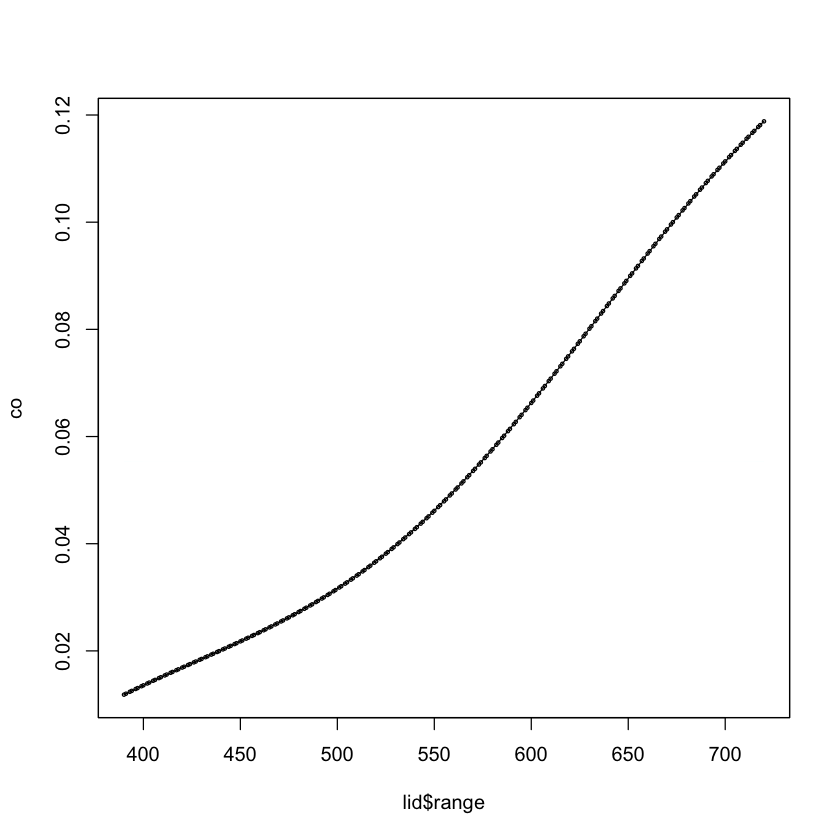

In [48]:
#part a
mx=sm.regression(x=lid$range, y=lid$logratio, method='cv', eval.points=lid$range)$estimate
sigma=sm.sigma(x=lid$range, y=lid$logratio)$estimate
n <- dim(lid)[1] 
ej=lid$logratio-mx
ab_ej=abs(ej)
#part b
plot(lid$range, ab_ej, col="blue")
#part c
#squiggle<-matrix(rnorm(221, mean=0, sd=1))
#c=sum(abs(squiggle))
par(new=TRUE)
sm.regression(x=lid$range, y=ab_ej, method='cv', eval.points=lid$range, col="green")

co=sm.regression(x=lid$range, y=ab_ej, method='cv', eval.points=lid$range)$estimate

sm.regression(x=lid$range, y=co, method='cv', model="no effect")


**4. The  dataset  “onions”  contains  results  from  an  experiment  conducted  to  measure  thedifference between two planting locations on the yield per plant of onion plants; it contains three variables:**

1.yield, the yield per plant; denote the log of yield byYj

2.dens, the planting density; denote this variable byZj

3.location, the location of the plot (0 for “Purnong Landing” and by 1 for “Virginia”);denote this variable byXj.


The planting density has a potentially large effect on the yield and,  because the plantingdensities differ between the two locations, it is important to control for this when comparinglocations.Consider the modelYj=βXj+m(Zj) +ej, j= 1,...,n,whereβis an unknown parameter,m(·) is an unknown function, and the jsatisfy the usual conditions.Using the functionsnpplregbwandnpplregin the package “np”, estimate the parameter β and find the standard error of the estimate.  Plot an estimate of the functionm(·).

In [21]:
library('np')
#data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/onions.csv'
data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/onions.csv'
onion<-read.csv(data_loc)

onion.bw=npplregbw(onion$yield~onion$location|onion$dens, regtype="ll")
onion.res=npplreg(onion.bw)
#B
coef(onion.res)
#SE
coef(onion.res, errors=T)
#estimate of m
onion.0=npplreg(onion.bw, exdat=seq(18.5, 185, 10), ezdat=seq(18.5, 185, 10))$mean

onion$location 
     -35.92039

onion$location 
      3.392365

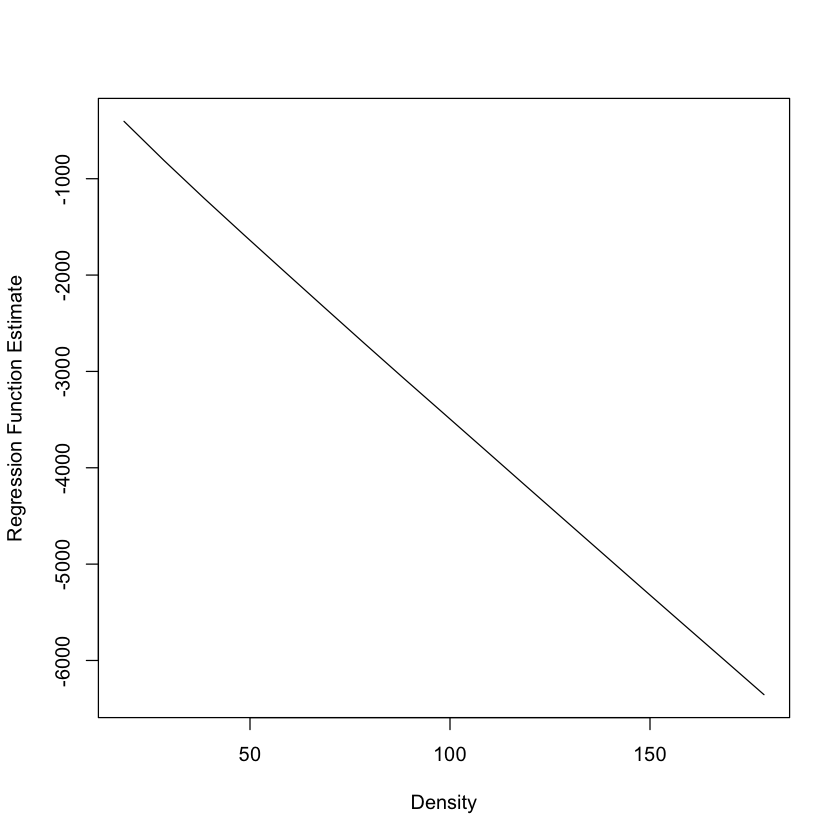

In [22]:
plot(seq(18.5, 185, 10), onion.0, type="l", xlab="Density", ylab="Regression Function Estimate")